### Is the rate of urbanisation associated with the rate of people who use the Internet ?

In [12]:
import numpy
import pandas
import statsmodels.api as sm
import seaborn
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pandas.read_csv(r"C:\Users\piush\Desktop\Dataset\gapminder.csv")

In [3]:
# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%.2f'%x)

In [5]:
# convert variables to numeric format using convert_objects function
data['internetuserate'] = pandas.to_numeric(data['internetuserate'], errors='coerce')
data['urbanrate'] = pandas.to_numeric(data['urbanrate'], errors='coerce')

In [6]:
############################################################################################
# BASIC LINEAR REGRESSION
############################################################################################

Axes(0.125,0.125;0.775x0.775)


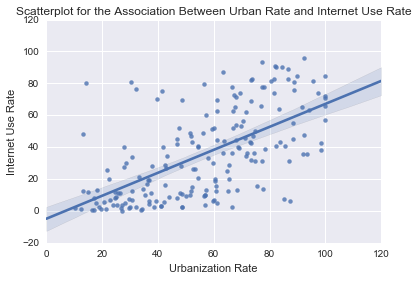

In [13]:
scat1 = seaborn.regplot(x="urbanrate", y="internetuserate", scatter=True, data=data)

plt.xlabel('Urbanization Rate')
plt.ylabel('Internet Use Rate')
plt.title ('Scatterplot for the Association Between Urban Rate and Internet Use Rate')
print(scat1)

In [14]:
print ("OLS regression model for the association between urban rate and internet use rate")
# reg1 is the model name , followed by equal sign. In the parantheses 
#write the formula the two quantative variables there is a tilda in between
# and the formula is in quotes

# read for more information
# http://statsmodels.sourceforge.net/devel/example_formulas.html
reg1 = smf.ols('internetuserate ~ urbanrate', data=data).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between urban rate and internet use rate
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     113.7
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.56e-21
Time:                        19:12:02   Log-Likelihood:                -856.14
No. Observations:                 190   AIC:                             1716.
Df Residuals:                     188   BIC:                             1723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------

Dep. variable is the name of the response variable

No. of observations show the valid observations

F-statistics is 113.7 and Prob(F-statistics is very small. Hence we can reject the null hypothesis. )

Parameter estimates : Intercept and urbanrate.. therefore

    internetrate = -4.90 + .72 * urbanrate
    
p>|t| is the pearson value for explanotory variables... when 0.000 p < 0.001

R-squared value : proportion of the variance. such as 38 % variance in this example.

### Polynomial Regression
Here is an example of a less extreme curve linear association between urban rate, and female employment rate, with a linear regression line. Returning to the Python script for the gap minder data set, the code to produce this scatter plot is here. Here we are creating an object called scat1, that will be our scatter plot. 

We then use the C born rig plot function, to plot our explanatory x variable urban rate. In our Y response variable, female employment rate separated by a comma. 

Note that the variable names for both variables have quotation marks around them. 

After another comma, we add scatter=True to tell Python to plot a scatter plot and then we tell it which data set to use. You can see that it looks like female employment rate decreases as urbanization rate increases. But that around urban rates of 80 or higher, it looks like female employment rate appears to increase. So it looks like kind of a u-shaped association. Just like with the anxiety and performance association a straight linear regression line isn't doing a good job of picking up the curvilinear part of the association. We can actually fit a line that curves, to better fit the association, by adding a polynomial term. For example, we could add a second order polynomial, or quadratic term, to draw the line of best fit that captures the curvature that we're seeing. To do this, we use the same seaborn regplot function code that was used to draw the scatter plot with the linear brushing line. 

In [18]:
# convert to numeric format
data['internetuserate'] = pandas.to_numeric(data['internetuserate'], errors='coerce')
data['urbanrate'] = pandas.to_numeric(data['urbanrate'], errors='coerce')
data['femaleemployrate'] = pandas.to_numeric(data['femaleemployrate'], errors='coerce')



In [19]:
# listwise deletion of missing values
sub1 = data[['urbanrate', 'femaleemployrate', 'internetuserate']].dropna()


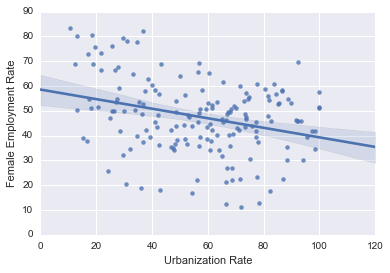

In [20]:
####################################################################################
# POLYNOMIAL REGRESSION
####################################################################################

# first order (linear) scatterplot
scat1 = seaborn.regplot(x="urbanrate", y="femaleemployrate", scatter=True, data=sub1)
plt.xlabel('Urbanization Rate')
plt.ylabel('Female Employment Rate')


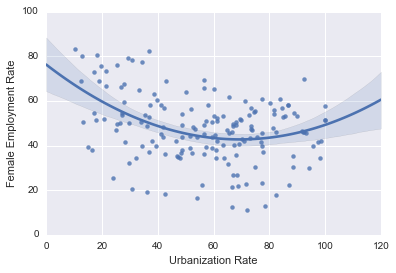

In [21]:
# fit second order polynomial
# run the 2 scatterplots together to get both linear and second order fit lines
scat1 = seaborn.regplot(x="urbanrate", y="femaleemployrate", scatter=True, order=2, data=sub1)
plt.xlabel('Urbanization Rate')
plt.ylabel('Female Employment Rate')

The difference is that we add some additional code within the parentheses with the seaborn regplot function. We add order=2 to ask for a quadratic line that includes the second order polynomial. If we run the code for both the linear and quadratic scatterplots at the same time. We will get a single scatterplot with both the straight linear line and the curved rush line. Now my scatterplot shows the original linear regression line in blue, and the quadratic regression line in green. Notice how the quadratic line does a better job of capturing the association at lower and higher urbanization rates. The points at these levels are closer to the quadratic, or second-order polynomial curve. Meaning that the expected or predicted values are closer to the observed values. So based on just looking at the two curves, it looks like the green quadratic curve fits the data better than the blue straight line. But we can be even more sure of this conclusion if we test to see whether adding a second order polynomial term to our aggression model gives us a significantly better fitting model. 


I do this by simply adding another variable that is the squared value of my explanatory x variable, x squared, to my regression model. First, let's test my regression model for just the linear association between urbanization rate and female employment rate using the ols function from the stats model API formula library. Note that we have centered our urban rate quantitative explanatory variable. Urban rate, underscore, c. Centering is especially important when testing a polynomial regression model. Because it makes it considerably easier to interpret the regression coefficients. If we look at the results, we can see from the significant P value and negative parameter estimate that female employment rate is negatively associated with urbanization rate. So the linear association, the blue line in the scatter plot, is statistically significant. But the R-square is 9%, indicating that the linear association of urban rate is capturing only about 9% of the variability in female employment rating. But what happens if we allow that straight line to curve by adding a second order polynomial to that regression equation. The Python code to do this is here. 

In [22]:
# center quantitative IVs for regression analysis
sub1['urbanrate_c'] = (sub1['urbanrate'] - sub1['urbanrate'].mean())
sub1['internetuserate_c'] = (sub1['internetuserate'] - sub1['internetuserate'].mean())
sub1[["urbanrate_c", "internetuserate_c"]].describe()

# linear regression analysis
reg1 = smf.ols('femaleemployrate ~ urbanrate_c', data=sub1).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:       femaleemployrate   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     16.69
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           6.84e-05
Time:                        22:33:07   Log-Likelihood:                -678.68
No. Observations:                 167   AIC:                             1361.
Df Residuals:                     165   BIC:                             1368.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      47.6024      1.096     43.416      

As you can see, it's the same code as for the linear regression model with the exception of some additional code. Specifically if you look at the formula we will now see that we have added another term to the model, that is the square of the urban rate explanatory variable. Stats model uses patsy formula language. Which is what we include inside the quotes when we name our response and explanatory variables, and any other variables we want to include in the model. Patsy provides a built-in function I, called the identity function, that just returns the input of what's in the parentheses. So in this case, the I, urbanrate star star two, returns a variable that it urbanrate raised to the power of two, that is, urbanrate squared. 


This term is our second order polynomial, or quadratic term. 


When we look at the table of results, we see that the value for the linear term for urban rate is negative, and the p value is less than 0.05. In addition, the quadratic term is positive insignificant, indicating that the curvilinear pattern we observed in our scatter plot is statistically significant. A negative linear coefficient and a positive quadratic coefficient indicates that the curve is convex. Such that starts high, then goes down, and then starts to go up again. This is consistent with the bowl shape pattern, this is consistent with bowl shaped quadratic curve we saw earlier in our scatter plot. In addition, you see that the R square increases to .16. Which means that adding the quadratic term for urban rate, increase the amount of variability in female employment rate that can be explained by urbanization rate from 9% to 16%. Together, these results suggest that the best fitting line for this association is one that includes some curvature. 


Note the two warnings in the output. The first warning is simply reminding you that the estimation of the standard errors assumes that your regression assumptions are met and that your model is correctly specified. 


The second warning indicates there are variables in the model that are highly correlated with each other. This is an indicator of multicorrelarity, which can create some instability in the estimation of the parameter estimates. And make it difficult to interpret them. Ordinarily if we have two highly correlated explanatory variables we would wanna put only one of them in the model. Obviously the second order polynomial which is urban rate squared is correlated with the urban rate. However in this case, we want to keep it in the model because we specifically want to capture the curve of linear relationship that was evident in our scatter plot. This brings us to another important characteristic of centering. 


Centering significantly reduces the correlation between the linear and quadratic variables in a polynomial regression model. We can also test more complex non linear associations by adding higher order polynomials. For example, you can add cubic, third order polynomial. Or even quartic, fourth order polynomial terms for the model to account for more complex curves. For example, this scatter plot shows more that one curve. In this case, adding a cubic, or third order polynomial term, might improve the fit of the model. One thing to keep in mind now is that modeling is more complex curve in the sample data, but often improve the fit of the model for that sample. However, it also increases the risk of doing something called Overfitting. Overfitting occurs when you get a model to explain you're responsible did really well on the sample. But that model becomes very specific to the sample data. That is it capitalizes on the variability that's present in that sample. The down side is that an overfitted model that fits the sample really well, may not fit well at all on another sample drawn from the same population. An overfitted model is biased toward the sample it was developed on. And consequently, the conclusions we draw from that model may not be representative of the population. So, we try to establish balance, where we identify a model that fits our sample well. But will also fit well if we tested it from another sample from the same population. This is called the bias-variance tradeoff and we will discuss this in more detail in the fourth course of the specialization machine learning for data analysis. 

In [25]:
# quadratic (polynomial) regression analysis

# run following line of code if you get PatsyError 'ImaginaryUnit' object is not callable
#del I
reg2 = smf.ols('femaleemployrate ~ urbanrate_c + I(urbanrate_c**2)', data=sub1).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:       femaleemployrate   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     15.60
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           6.30e-07
Time:                        22:35:01   Log-Likelihood:                -672.19
No. Observations:                 167   AIC:                             1350.
Df Residuals:                     164   BIC:                             1360.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              43.8428    

                            OLS Regression Results                            
Dep. Variable:       femaleemployrate   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     11.92
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.25e-07
Time:                        22:40:23   Log-Likelihood:                -670.17
No. Observations:                 167   AIC:                             1348.
Df Residuals:                     163   BIC:                             1361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              43.9886    

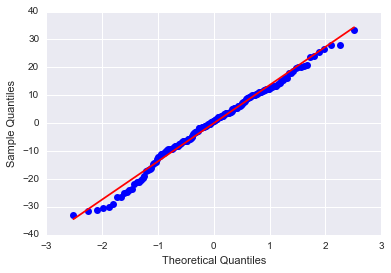

In [27]:
####################################################################################
# EVALUATING MODEL FIT
####################################################################################

# adding internet use rate
reg3 = smf.ols('femaleemployrate  ~ urbanrate_c + I(urbanrate_c**2) + internetuserate_c', 
               data=sub1).fit()
print (reg3.summary())

#Q-Q plot for normality
fig4=sm.qqplot(reg3.resid, line='r')







Specification is the process of developing a regression model. 

If a model is correctly specified than the residuals or error terms, are not correlated with the explanatory variables. If the data failed to meet the regression assumptions, or if our model is missing important explanatory variables, then we have model specification error. We perform regression diagnostics to try to understand the cause of the misspecification, so that we can try to address it. We can assess violation of the assumptions of the linear regression analysis, by examining model residuals. That is, we can take a closer look at the e in our regression formula, which is the error, or residual estimate. There are many regression diagnostic procedures to choose from. In this course, we will focus on examining residual plots, in order to visually evaluate specification error. First, let's add another centered explanatory variable, internetuserate, to our regression equation. Internet use can be considered an indicator of a country's level of modernization. Here's the regression equation for this model and the python code. This is the same gap minder model that we tested previously with the exception that we have added the centered internetuserate explanatory variable. And here are the results. We haven't yet discussed the interpretation of the intercept in detail. The intercept is the value of the response variable, when all explanatory variables are held constant at zero. Because we centered our two explanatory variables, so that the mean for each variable was equal to zero, the intercept is the female employment rate at the mean of urban rate, and Internet use rate. So, the female employment rate when urban rate, and Internet use rates are at their means is 44 out of every 100 women. There is also a show that coefficients for the linear, and quadratic urban rate variables, remain significant after adjusting for Internet use rate. Internet use rate is also statistically significant. The positive regression coefficient, indicates that countries with a high rate of internet usage, tend to have a higher female employment rate. Each observation has an estimated response value. Which is also referred to as a predicted or fitted response value, based on the regression equation. But we know, that this equation does not estimate the observed response value for that observation perfectly. In fact, urban rate and Internet use rate together, explain only about 18% of the variability in female employment rate. So, there's clearly some error in estimating the response value with this model. In this regression model, the residual is the difference between the expected or predicted female employment rate, and the actual observed female employment rate for each country. We can take a look at this residual variability, which not only helps us to see how large the residuals are, but also allows us to see whether our regression assumptions are met. And whether there are any outlying observations, that might be unduly influencing the estimation of the regression coefficient. The easiest way to evaluate residuals, is to graph them. FIrst, we can use a qq-plot to evaluate the assumption that the residuals from our aggression model are normally distributed. A qq-plot, plots the quantiles of the residuals that we would theoretically see if the residuals followed a normal distribution, against the quantiles for the residuals estimated from our aggression model. The python code to generate a qq-plot is here. First we create an object called fig1, that will be our qq-plot. Then an equal sign followed by sm.qqplot which calls in the qqplot function from the stats model library. In parentheses we include reg3.resid where reg3 is the object that contains our multiple regression results, and resid, r-e-s-i-d contains the model residuals. Then, we add a comma, and line equals r with the r in quotes which tells Python to generate a red linear regression line on the plot. What we're looking for is to see if the points follow a straight line. Meaning that the model estimated residuals are what we would expect if the residuals were normally distributed. The qqplot for our regression model shows that the residuals generally follow a straight line, but deviate at the lower and higher quantiles. This indicates that our residuals did not follow perfect normal distribution. This could mean that the curvilinear association that we observed in our scatter plot may not be fully estimated by the quadratic urban rate term. There might be other explanatory variables that we might consider including in our model, that could improve estimation of the observed curvilinearity. 

To evaluate the overall fit of the predicted values of the response variable to the observed values and to look for outliers, we can examine a plot of the standardized residuals for each of the observations. The standardized residuals are simply the residual values transformed to have a mean of zero and a standard deviation of one. This transformation is called normalizing or standardizing the values so that they fit a standard normal distribution. In a standard normal distribution 68% of the observations are expected to fall within one standard deviation of the mean. So between -1 and 1 standard deviations. And 95% of the observations are expected to fall within 2 standard deviations of the mean. Here is the code to graph the residuals for each observation in Python. 

In this first line of code, we are creating an object called stdres. For which we use the pandas DataFrame function to convert the array of standardized residuals to a data frame. 

Reg3 is the name of the object that contains the results of our regression analysis and resid_pearson tells Python to use the standardized residuals from the model. The second line of code uses the mat plot lib.plot function, to generation a plot of the standardized residuals in an object that we call fig2. The o tells Python to use circles as value markers. And the ls='none', in single quotes, tells Python to not connect the markers with a line. Finally, the third line of code draws a horizontal line on the graph at a value of zero on the vertical axis using color equals r, which makes the line red. 

Then we label the graph axes. If we take a look at this plot, we see that most of the residuals fall within one standard deviation of the mean. So basically, they're either between -1 or 1, and all but a few countries have residuals that are more than 2 standard deviations above or below the mean of 0. With the standard normal distribution, we would expect 95% of the values of the residuals to fall between two standard deviations of the mean. Residual values that are more than two standard deviations from the mean in either direction, are a warning sign that we may have some outliers. However, there are no observations that have three or more standard deviations from the mean. So we do not appear to have any extreme outliers. In terms of evaluating the overall fit of the model, there's some other rules of thumb that you can use to determine how well your model fits the data based on the distribution of the residuals. If more than 1% of our observations has standardized residuals with an absolute value greater than 2.5, or more than 5% have an absolute value of greater than or equal to 2, then there is evidence that the level of error within our model is unacceptable. That is the model is a fairly poor fit to the observed data. None of the residuals from our value exceeded an absolute value of 2.5. But 5.4% were greater than or equal to an absolute value of 2.0. This suggests that the fit of the model is relatively poor and could be improved. The biggest contributor to poor model fit is leaving out important explanatory variables. In order to improve the fit of this model, we should include more explanatory variables to better explain the variability in our female employment rate response variable.

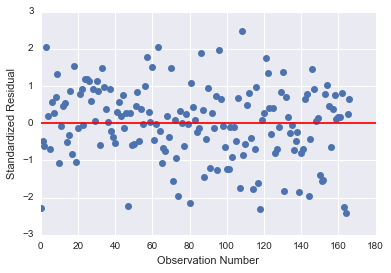

In [28]:
# simple plot of residuals
stdres=pandas.DataFrame(reg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')




The following Python code can be used to generate a few more plots to help us determine how specific explanatory variables contribute to the fit of our model. In this example we're examining the Internet use explanatory variable but we can also look at these plots for other explanatory variables. Here we are using the plt.figure function to create an object called fig3 that contains an empty figure with figsize equal to 12,8. These numbers specify the size of the plot image. Each unit is equal to 80 pixels. 12 times 80 equals 960 pixels and 8 times 80 equals 640 pixels. So what we're doing with the fig size command here is generating a 960 by 640 pixel plot image. You can change the size of this image by changing the values in the parenthesis. The second line of code uses the graphic.plot_regress_exog function from the stats model library to generate multiple diagnostic plots. In the parenthesis, we specify the name of the object that has our model results, which is reg3 followed by a comma. Then in quotes we specify the explanatory variable that we want to plot followed by a comma. Finally fig equals fig 3 tells Python to put the information from our sm.graphics.plot_regress_exog exog function into the fig 3 plot object. Then we ask Python to print the plots. The primary plots of interest are the plots of the residuals for each observation of different of values of Internet net use rates in the upper right hand corner and partial regression plot which is in the lower left hand corner. The plot in the upper right hand corner shows the residuals for each observation at different values of Internet use rate. There's clearly a funnel shaped pattern to the residuals where we can see that the absolute values of the residuals are significantly larger at lower values of Internet use rate. But get smaller, closer to zero, as Internet use rate increases. But then they start to get larger at higher levels. This is consistent with the other aggression diagnostic plots that indicate that this model does not predict female employment rate as well for countries that have either high or low levels of Internet use rate. But is particularly worse predicting female employment rates for countries with low Internet usage. Similar to our urban rate variable, there also appears to be a sort of a curve, or linear pattern to these observations. Where the residuals seem to get larger again for countries for which Internet use rates exceeds about 80 per 100 residents. This suggests that the association between Internet use rate and female employment rate may also be curvilinear. So maybe we also want to add a second order polynomial, or quadratic term, for Internet use rate as an explanatory variable to the model as well. Finally, because we have multiple explanatory variables, we might want to take a look at the contribution of each individual explanatory variable to model fit, controlling for the other explanatory variables. One type of plot that does this, is the partial regression residual plot. The third plot, in the lower left hand corner, is a partial regression residual plot. It attempts to show the effect of adding Internet use rate as an additional explanatory variable to the model. Given that one or more explanatory variables are already in the model. For the Internet use rate variable, the values in the scatter plot are two sets of residuals. The residuals from a model predicting the female employment rate response from the other explanatory variables, excluding Internet use, are plotted on the vertical access, and the residuals from the model predicting Internet use rate from all the other explanatory variables are plotted on the horizontal access. What this means is that the partial regression plot shows the relationship between the response variable and specific explanatory variable, after controlling for the other explanatory variables. We can examine the plot to see if the Internet use rate residuals show a linear, or non-linear pattern. If the Internet use variable shows a linear relationship to the dependent variable after adjusting for the variables already in the model, it meets the linearity assumption in the multiple regression. If there is an obvious non-linear pattern, this would be additional support for adding a polynomial term for Internet use rate to the model. When we take a look at the plot for Internet use rate in the lower left-hand corner, we see that, in contrast to the plot of the residuals at different values of Internet use rate without adjusting for the urban rate variables, which is shown above, the partial regression plot for Internet use does not clearly indicate a non-linear association. Rather, the residuals are spread out in a random pattern around the partial regression line. In addition, many of the residuals are pretty far from this line, indicating a great deal of female employment rate prediction error. This suggests that although Internet use rate shows a statistically significant association with female employment rate, this association is pretty weak after controlling for urbanization rate. We can look at the partial regression residual plots for each of the other explanatory variables as well. Finally, we can examine a leverage plot to identify observations that have an unusually large influence on the estimation of the predicted value of the response variable, female employment rate, or that are outliers, or both. The leverage of an observation can be thought of in terms of how much the predicted scores for the other observations would differ if the observations in question were not included in the analysis. The leverage always takes on values between zero and one. A point with zero leverage has no effect on the regression model. And outliers are observations with residuals greater than 2 or less than -2. We use the following Python code to generate a leverage plot. We use the stats model graphics function again, but this time we use the code influence_plot. In parentheses, we include the name of the object that has the result of our regression analysis, reg3, followed by a comma. Size=8 is an option to make the points on the plot smaller than the default size so that they're easier to distinguish. One of the first things we see in the leverage plot is that we have a few outliers, contents that have residuals greater than 2 or less than -2. We've already identified some of these outliers in some of the other plots we've looked at, but this plot also tells us that these outliers have small or close to zero leverage values, meaning that although they are outlying observations, they do not have an undue influence on the estimation of the regression model. On the other hand, we see that there are a few cases with higher than average leverage. But one in particular is more obvious in terms of having an influence on the estimation of the predicted value of female employment rate. This observation has a high leverage but is not an outlier. We don't have any observations that are both high leverage and outliers. 


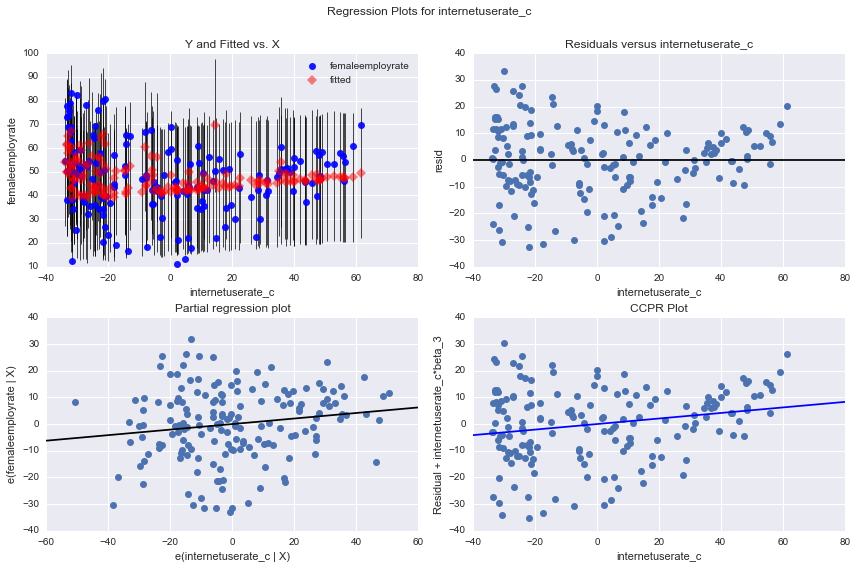

In [35]:
# additional regression diagnostic plots
fig2 = plt.figure(figsize = (12,8))
fig2 = sm.graphics.plot_regress_exog(reg3,  "internetuserate_c", fig=fig2)



Figure(480x320)


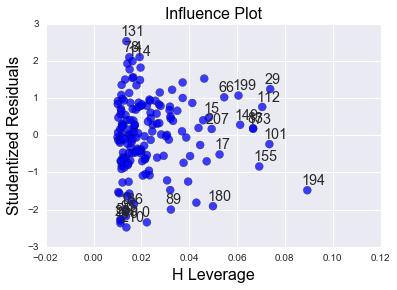

In [30]:
# leverage plot
fig3=sm.graphics.influence_plot(reg3, size=8)
print(fig3)